In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from keras.datasets import fashion_mnist

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

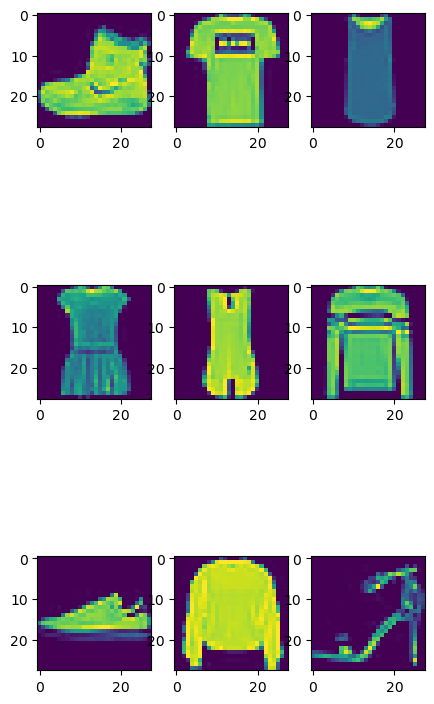

In [5]:
plt.figure(figsize=(5,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i,:,:])

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_train = X_train.astype('float32') / 255

In [8]:
X_test = X_test.reshape((10000, 28, 28, 1))
X_test = X_test.astype('float32') / 255

In [9]:
from keras.utils import to_categorical

In [10]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
from keras import models 
from keras import layers
from tensorflow.keras.callbacks import EarlyStopping

In [12]:
early_stop = EarlyStopping(
    monitor='val_loss',   # تراقب ال validation loss
    patience=3,           # لو مفيش تحسن 3 epochs ورا بعض يوقف
    restore_best_weights=True  # يرجّع أفضل وزن وصله الموديل
)


In [13]:
cnn = models.Sequential()

cnn.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
cnn.add(layers.MaxPool2D((2, 2)))

cnn.add(layers.Conv2D(64, (3,3), activation='relu'))
cnn.add(layers.MaxPool2D((2, 2)))

cnn.add(layers.Conv2D(64, (3,3), activation='relu'))

cnn.add(layers.Flatten())
cnn.add(layers.Dense(64, activation='relu'))
cnn.add(layers.Dense(10, activation='softmax'))

C:\Users\ELmohannd\Downloads\anacond2025\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
cnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
history = cnn.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2, callbacks=[early_stop])

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.6904 - loss: 0.8335 - val_accuracy: 0.8583 - val_loss: 0.3898
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8625 - loss: 0.3781 - val_accuracy: 0.8769 - val_loss: 0.3426
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.8886 - loss: 0.3019 - val_accuracy: 0.8845 - val_loss: 0.3254
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.8993 - loss: 0.2710 - val_accuracy: 0.9006 - val_loss: 0.2720
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9113 - loss: 0.2410 - val_accuracy: 0.8996 - val_loss: 0.2749
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9177 - loss: 0.2235 - val_accuracy: 0.9038 - val_loss: 0.2692
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9257 - loss: 0.2006 - val_accuracy: 0.9084 - val_loss: 0.2608
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9313 - loss: 0.1885 - 

In [16]:
cnn.history.history

{'accuracy': [0.7796458601951599,
  0.8705416917800903,
  0.8895624876022339,
  0.9022083282470703,
  0.9109583497047424,
  0.9178333282470703,
  0.9250624775886536,
  0.9312916398048401,
  0.9357500076293945,
  0.9412916898727417,
  0.9467291831970215,
  0.9510833621025085],
 'loss': [0.5889951586723328,
  0.35670313239097595,
  0.30003851652145386,
  0.26672565937042236,
  0.2428385615348816,
  0.22211697697639465,
  0.20301346480846405,
  0.18571540713310242,
  0.17333745956420898,
  0.15940076112747192,
  0.146551713347435,
  0.1357896327972412],
 'val_accuracy': [0.8583333492279053,
  0.8769166469573975,
  0.8845000267028809,
  0.9005833268165588,
  0.8995833396911621,
  0.9037500023841858,
  0.9084166884422302,
  0.9082499742507935,
  0.9143333435058594,
  0.9043333530426025,
  0.9052500128746033,
  0.9082499742507935],
 'val_loss': [0.38976848125457764,
  0.34260082244873047,
  0.3253628611564636,
  0.2719743549823761,
  0.2749357223510742,
  0.2691616117954254,
  0.260772168636

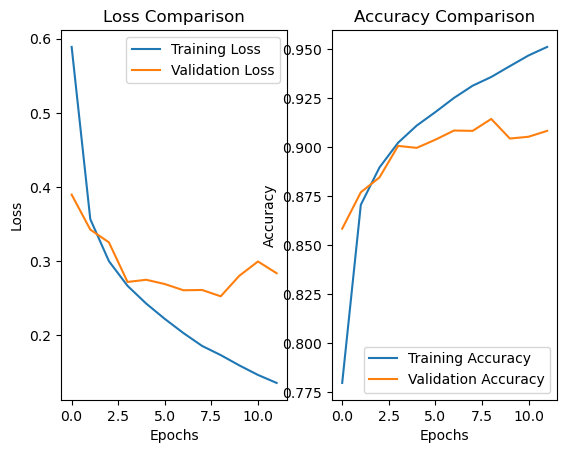

In [17]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Comparison')
plt.legend()

# Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.legend()

In [18]:
y_pred = cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [19]:
y_pred = np.argmax(np.round(y_pred), axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [20]:
y_test = np.argmax(np.round(y_test), axis=1)
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [21]:
for i in range(0, 10):
    print(y_pred[i], y_test[i])

9 9
2 2
1 1
1 1
6 6
1 1
4 4
6 6
5 5
7 7


In [22]:
from sklearn.metrics import classification_report, accuracy_score

In [23]:
print(f"{accuracy_score(y_test, y_pred) * 100:.2f}%")


90.23%


In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82      1000
           1       0.99      0.98      0.98      1000
           2       0.84      0.89      0.86      1000
           3       0.93      0.88      0.91      1000
           4       0.85      0.87      0.86      1000
           5       0.97      0.98      0.98      1000
           6       0.77      0.69      0.72      1000
           7       0.96      0.95      0.95      1000
           8       0.99      0.96      0.97      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



# Thanks and Keep Going